In [1]:
# import library
import pandas as pd

In [2]:
#read data
purchase = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Customer%20Purchase.csv')

In [26]:
# display first 5 rows
purchase.head()

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


In [4]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  50 non-null     int64 
 1   Age          50 non-null     int64 
 2   Gender       50 non-null     object
 3   Education    50 non-null     object
 4   Review       50 non-null     object
 5   Purchased    50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [5]:
purchase.describe()

,Customer ID,Age
count,50.00000,50.000000
mean,1045.50000,54.160000
std,14.57738,25.658161
min,1021.00000,15.000000
25%,1033.25000,30.250000
50%,1045.50000,57.000000
75%,1057.75000,74.000000
max,1070.00000,98.000000


In [6]:
purchase.columns

Index(['Customer ID', 'Age', 'Gender', 'Education', 'Review', 'Purchased'], dtype='object')

In [7]:
# define y and features of x
y = purchase['Purchased']
x = purchase.drop([ 'Customer ID', 'Purchased'], axis=1)

In [8]:
# encoding categorical variable
x.replace({'Review':{'Poor':0,'Average':1,'Good':2}},inplace=True)
x.replace({'Education':{'School':0,'UG':1,'PG':2}},inplace=True)
x.replace({'Gender':{'Male': 0,'Female':1}},inplace=True)

In [9]:
# train test split
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=2529)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40, 4), (10, 4), (40,), (10,))

In [11]:
# select model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
# train model
model.fit(x_train, y_train)

LogisticRegression()

In [13]:
# prediction
y_pred = model.predict(x_test)

In [14]:
y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No'],
      dtype=object)

In [15]:
# test accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [16]:
confusion_matrix(y_test,y_pred)

array([[2, 1],
       [7, 0]])

In [17]:
accuracy_score(y_test,y_pred)

0.2

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.22      0.67      0.33         3
         Yes       0.00      0.00      0.00         7

    accuracy                           0.20        10
   macro avg       0.11      0.33      0.17        10
weighted avg       0.07      0.20      0.10        10



<Axes: xlabel='Purchased', ylabel='Count'>

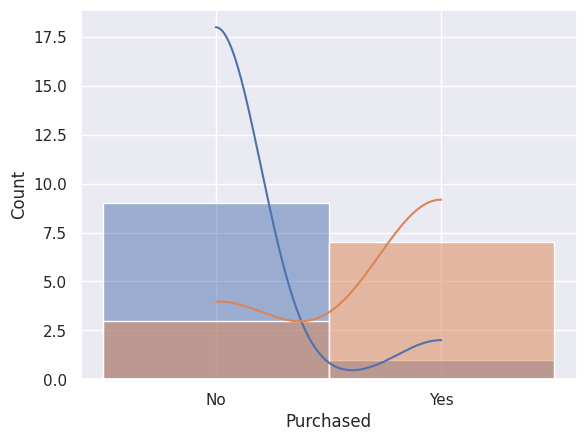

In [112]:
# Data visualization
import seaborn as sns
sns.set(color_codes=True)
sns.histplot(y_pred, label='Predicted', kde=True)
sns.histplot(y_test, label='True', kde=True)